# Some Common Gates in Qiskit


In [227]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt


In [228]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)


In [229]:
circ = QuantumCircuit(qr, cr)


In [230]:
circ.measure(0, 0)


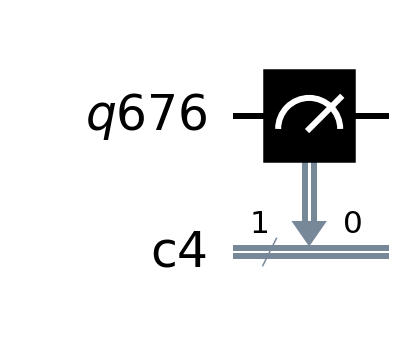

In [231]:
circ.draw("mpl", scale=3)


In [232]:
simulator = BasicAer.get_backend("qasm_simulator")


In [233]:
job = execute(circ, simulator, shots=1000)


In [234]:
counts = job.result().get_counts()


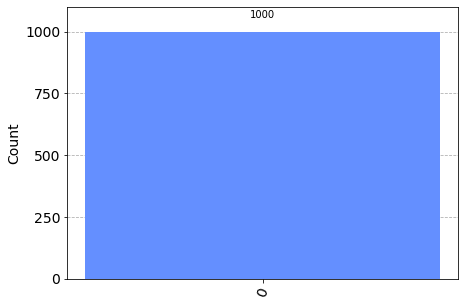

In [235]:
plot_histogram(counts)


## A neat function to view the results 😌

In [236]:
def view_results(circuit, simulator):
    job = execute(circ, simulator, shots=1000)
    counts = job.result().get_counts()
    print(f"Counts for 1000 shots: {counts}")
    return plot_histogram(counts)


## Pauli Gate

**Pauli's X-gate is also often called a NOT-gate**

`circ.x(index_of_qubit)`


Counts for 1000 shots: {'1': 1000}


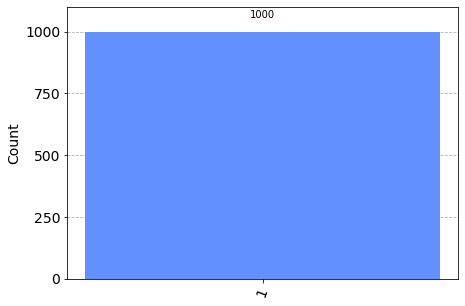

In [237]:
circ.x(0)
circ.measure(0, 0)
view_results(circ, simulator)


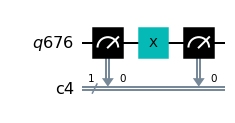

In [238]:
circ.draw('mpl')

## Hadamard Gate

`circ.h(index_of_qubit)`


Counts for 1000 shots: {'0': 526, '1': 474}


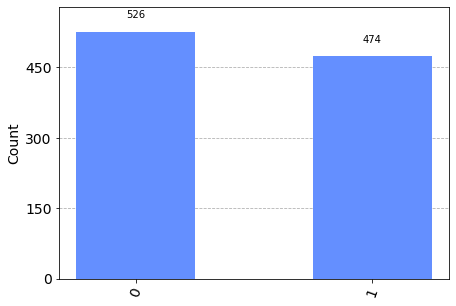

In [239]:
circ.h(0)
circ.measure(0, 0)
view_results(circ, simulator)


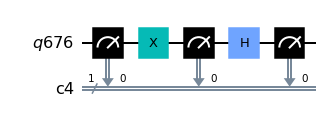

In [240]:
circ.draw('mpl')

## CNOT Gate

The CNOT gate is two-qubit operation, where the first qubit is usually referred to as the control qubit and the second qubit as the target qubit. Expressed in basis states, the CNOT gate:

- leaves the control qubit unchanged and performs a Pauli-X gate on the target qubit when the control qubit is in state ∣1⟩
- leaves the target qubit unchanged when the control qubit is in state ∣0⟩.

`circ.cx(index_of_control_qubit,index_of_target_qubit)`


Counts for 1000 shots: {'00': 1000}


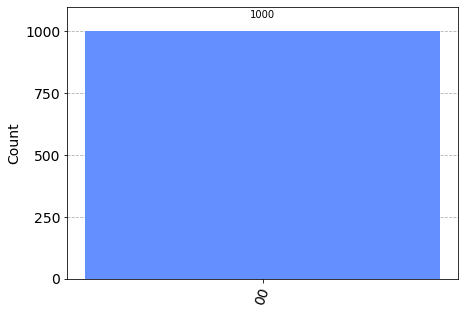

In [241]:
circ = QuantumCircuit(2, 2)
# circ.x(0)
circ.cx(0, 1)
circ.measure(0, 0)
circ.measure(1, 1)
circ.draw("mpl")
view_results(circ, simulator)


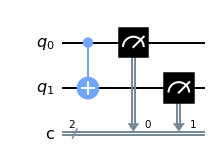

In [242]:
circ.draw("mpl")

# Logic Gates using Qiskit


In [243]:
def test(circuit):
    backend = BasicAer.get_backend("qasm_simulator")
    job = execute(circuit, backend, shots=1000)
    result = job.result()
    return list(result.get_counts().keys())[0]


## Classical AND Gate

A	B	Y
0	0	0
0	1	0
1	0	0
1	1	1


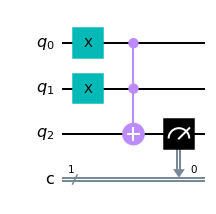

In [244]:

print("A\tB\tY")
l = [(0, 0), (0, 1), (1, 0), (1, 1)]
for a, b in l:
    circ = QuantumCircuit(3, 1)
    if a != 0:
        circ.x(0)
    if b != 0:
        circ.x(1)
    circ.ccx(0, 1, 2)
    circ.measure(2, 0)
    print(f"{a}\t{b}\t{test(circ)}")

circ.draw('mpl')


## Classical OR Gate

A	B	Y
0	0	0
0	1	1
1	0	1
1	1	1


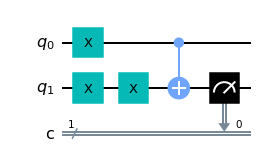

In [245]:
print("A\tB\tY")
l = [(0, 0), (0, 1), (1, 0), (1, 1)]
for a, b in l:
    circ = QuantumCircuit(2, 1)
    if a != 0:
        circ.x(0)
    if b != 0:
        circ.x(1)
    if a==1 and b==1:
        circ.x(1)

    circ.cx(0, 1)

    circ.measure(1,0)
    print(f"{a}\t{b}\t{test(circ)}")
circ.draw('mpl')


## Classical NOT Gate

A	Y
0	1
1	0


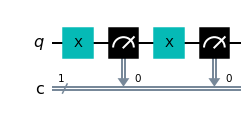

In [246]:
print("A\tY")
l = [0,1]
circ = QuantumCircuit(1, 1)
for a in l:
    circ.x(0)
    

    circ.measure(0,0)
    print(f"{a}\t{test(circ)}")
circ.draw('mpl')


## XOR Gate

A	B	Y
0	0	0
0	1	1
1	0	1
1	1	0


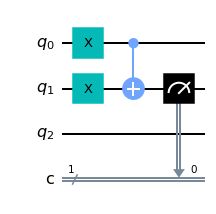

In [247]:

print("A\tB\tY")
l = [(0, 0), (0, 1), (1, 0), (1, 1)]
for a, b in l:
    circ = QuantumCircuit(3, 1)
    if a != 0:
        circ.x(0)
    if b != 0:
        circ.x(1)
    circ.cx(0, 1)
    circ.measure(1, 0)
    print(f"{a}\t{b}\t{test(circ)}")

circ.draw('mpl')
